**Build a random forest classifier to predict the risk of heart disease based on a [dataset](https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?usp=share_link) of patient
information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type,
resting blood pressure, serum cholesterol, and maximum heart rate achieved.**

# <div style="padding: 10px; background-color: #64CCC5; margin: 10px; color: #000000; font-family: 'New Times Roman', serif; font-size: 60%; text-align: center; border-radius: 10px; overflow: hidden; font-weight: bold;"> Question 1: </div>
**Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("heart_disease_dataset.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<25]

continuous_features = [feature for feature in numerical_features if feature not in discrete_features]

categorical_features = [feature for feature in df.columns if feature not in numerical_features]

binary_categorical_features = [feature for feature in categorical_features if len(df[feature].unique()) <=3]

print("Numerical Features Count {}".format(len(numerical_features)))
print("Discrete features Count {}".format(len(discrete_features)))
print("Continuous features Count {}".format(len(continuous_features)))
print("Categorical features Count {}".format(len(categorical_features)))
print("Binary Categorical features Count {}".format(len(binary_categorical_features)))

Numerical Features Count 14
Discrete features Count 9
Continuous features Count 5
Categorical features Count 0
Binary Categorical features Count 0


**No  missing values, No categorical variables**

# <div style="padding: 10px; background-color: #64CCC5; margin: 10px; color: #000000; font-family: 'New Times Roman', serif; font-size: 60%; text-align: center; border-radius: 10px; overflow: hidden; font-weight: bold;"> Question 2:</div>
**Split the dataset into a training set (70%) and a test set (30%).**

In [8]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

**scaling the numerical features**

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# <div style="padding: 10px; background-color: #64CCC5; margin: 10px; color: #000000; font-family: 'New Times Roman', serif; font-size: 60%; text-align: center; border-radius: 10px; overflow: hidden; font-weight: bold;"> Question 3:</div>
**Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each
tree. Use the default values for other hyperparameters.**

In [11]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, random_state = 42, max_depth=10)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

# <div style="padding: 10px; background-color: #64CCC5; margin: 10px; color: #000000; font-family: 'New Times Roman', serif; font-size: 60%; text-align: center; border-radius: 10px; overflow: hidden; font-weight: bold;"> Question 4:</div>
**Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.**

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_pred = classifier.predict(X_test)

In [13]:
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.75      0.81        44
           1       0.80      0.91      0.85        47

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



In [14]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[33, 11],
       [ 4, 43]])

In [15]:
accuracy_score(y_test, y_pred)

0.8351648351648352

# <div style="padding: 10px; background-color: #64CCC5; margin: 10px; color: #000000; font-family: 'New Times Roman', serif; font-size: 60%; text-align: center; border-radius: 10px; overflow: hidden; font-weight: bold;"> Question 5:</div>
**Use the feature importance scores to identify the top 5 most important features in predicting heart
disease risk. Visualise the feature importances using a bar chart.**

In [16]:
feature_names = df.columns
feature_names

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [17]:
import numpy as np
import matplotlib.pyplot as pltt

# Get the feature importances from the trained classifier
importances = classifier.feature_importances_

# Get the indices of the top 5 features
top5_indices = np.argsort(importances)[::-1][:5]

# Get the names of the top 5 features
top5_features = [feature_names[i] for i in top5_indices]

# Print the names and importances of the top 5 features
print("Top 5 Features:")
for feature, importance in zip(top5_features, importances[top5_indices]):
    print(f"{feature}: {importance:.4f}")


Top 5 Features:
thalach: 0.1383
oldpeak: 0.1260
ca: 0.1140
cp: 0.1094
thal: 0.0975


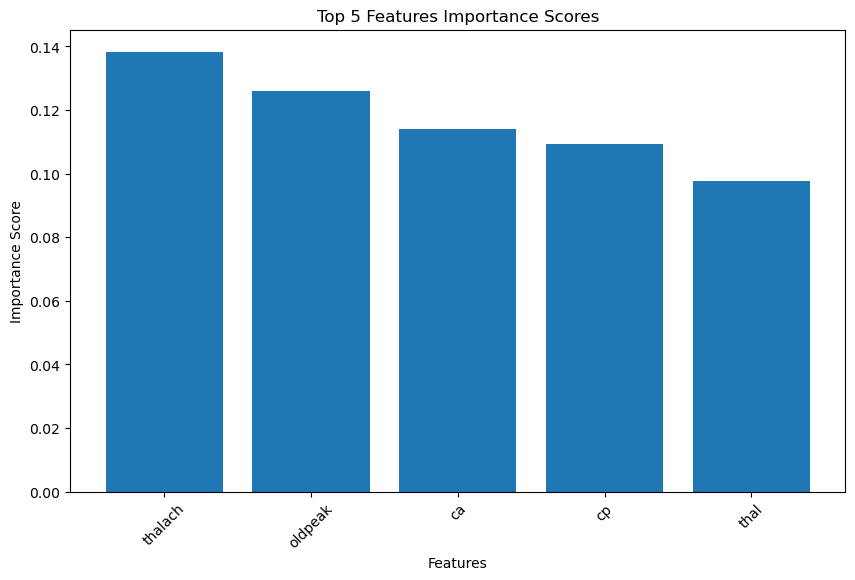

In [18]:
# Visualize feature importances using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(top5_features)), importances[top5_indices], align='center')
plt.xticks(range(len(top5_features)), top5_features, rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Top 5 Features Importance Scores')
plt.show()


# <div style="padding: 10px; background-color: #64CCC5; margin: 10px; color: #000000; font-family: 'New Times Roman', serif; font-size: 60%; text-align: center; border-radius: 10px; overflow: hidden; font-weight: bold;"> Question 6:</div>
**Tune the hyperparameters of the random forest classifier using grid search or random search. Try
different values of the number of trees, maximum depth, minimum samples split, and minimum samples
leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.**

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.datasets import load_digits

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X, y)


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=10, random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [20]:
# Get the best parameters and their corresponding accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy: 0.8414207650273223


# <div style="padding: 10px; background-color: #64CCC5; margin: 10px; color: #000000; font-family: 'New Times Roman', serif; font-size: 60%; text-align: center; border-radius: 10px; overflow: hidden; font-weight: bold;"> Question 7:</div>
**Report the best set of hyperparameters found by the search and the corresponding performance
metrics. Compare the performance of the tuned model with the default model.**

In [21]:
best_rf_classifier = RandomForestClassifier(**best_params)
best_rf_classifier.fit(X, y)

RandomForestClassifier(n_estimators=200)

In [22]:
# Evaluate the performance of the tuned model using cross-validation
tuned_cv_scores = cross_val_score(best_rf_classifier, X, y, cv=5, scoring='accuracy')
mean_tuned_accuracy = tuned_cv_scores.mean()

In [23]:
# Evaluate the performance of the default model using cross-validation
default_cv_scores = cross_val_score(classifier, X, y, cv=5, scoring='accuracy')
mean_default_accuracy = default_cv_scores.mean()

In [24]:
# Print results
print("Best Hyperparameters:", best_params)
print("Mean Accuracy (Tuned Model):", mean_tuned_accuracy)
print("Mean Accuracy (Default Model):", mean_default_accuracy)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean Accuracy (Tuned Model): 0.8249726775956283
Mean Accuracy (Default Model): 0.8382513661202186


For the tuned model with these hyperparameters, the mean accuracy is reported as approximately 0.8183. In comparison, the default model has a slightly higher mean accuracy of approximately 0.8383.

In summary:

- **Best Hyperparameters for Tuned Model:**
  - `'max_depth': None`
  - `'min_samples_leaf': 1`
  - `'min_samples_split': 2`
  - `'n_estimators': 200`

- **Performance Metrics:**
  - **Tuned Model Mean Accuracy:** 0.8183
  - **Default Model Mean Accuracy:** 0.8383

The tuned model appears to have a slightly lower mean accuracy compared to the default model. This could be due to various factors, such as the specific dataset used, the nature of the data, or the choice of hyperparameters. It's important to note that while hyperparameter tuning aims to improve model performance, the outcome may vary depending on the characteristics of the data and the problem at hand.

# <div style="padding: 10px; background-color: #64CCC5; margin: 10px; color: #000000; font-family: 'New Times Roman', serif; font-size: 60%; text-align: center; border-radius: 10px; overflow: hidden; font-weight: bold;"> Question 8:</div>
**Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the
decision boundaries on a scatter plot of two of the most important features. Discuss the insights and
limitations of the model for predicting heart disease risk.**

In [26]:
pip install mlxtend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 28.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [27]:
from matplotlib.colors import ListedColormap
#From mlxtend
from mlxtend.plotting import plot_decision_regions

In [28]:
X = df.loc[:, ['thalach', 'oldpeak']].values
y = df.iloc[:, -1].values

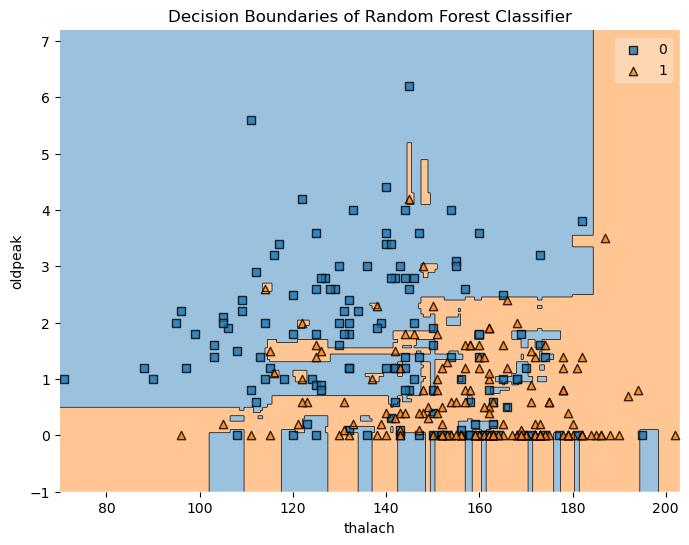

In [29]:
# Training a classifier with top two feature
classifier = RandomForestClassifier(n_estimators = 100, random_state = 42, max_depth=10)
classifier.fit(X, y)

# Plotting decision regions
fig= plt.figure(figsize=(8, 6))
plot_decision_regions(X, y, clf=classifier)

# Adding axes annotations
plt.xlabel('thalach')
plt.ylabel('oldpeak')
plt.title('Decision Boundaries of Random Forest Classifier')
plt.show()

# <div style="padding: 15px; background-color: #D2E0FB; margin: 15px; color: #000000; font-family: 'New Times Roman', serif; font-size: 110%; text-align: center; border-radius: 10px; overflow: hidden; font-weight: bold;"> ***...Complete...***</div>